# **Identificación de la Potencial Fuga de Clientes del Servicio de Tarjeta de Créditos de un Banco** #

**Data:**
> **BankChurners.csv**
>
> - Este conjunto de datos se obtuvo de consultar un determinado tiempo la sgte url: ‎‎https://leaps.analyttica.com/home‎‎.
> - Esta data contiene 10.000 clientes que mencionan su edad, salario, marital_status, límite de tarjeta de crédito, categoría de tarjeta de crédito, etc. 

**Link de los datos:**
> https://www.kaggle.com/sakshigoyal7/credit-card-customers?select=BankChurners.csv


In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from warnings import filterwarnings 
filterwarnings('ignore')

#**1.- Comprension del Negocio**

Un gerente de banco se siente incómodo por que cada vez más clientes abandonan sus servicios de tarjeta de crédito. Asi que se encuentra en busca de soluciones que le permitan tomar acciones de manera proactiva frente al cliente para brindarle un mejor servicio y/u ofertas que ayuden a cambiar su decision.

> **Objetivo**: 
>
> Ofrecer productos de análitica que ayuden a retener e identificar a clientes que puedan salir del banco / Usando modelos de ML se busca predecir el abandono de servicios de la tarjeta de credito

### **> Problema**


- El aumento progresivo de casos de desercion de servicios de tarjeta de crédito en el banco.

### **> Planteamiento del problema** 
- ¿Como un modelo predictivo ayudara a la identificacion de la fuga del cliente?

#**2. Análisis Exploratorio**##

In [2]:
# Importar los datos desde el repositorio
banco = pd.read_csv("https://raw.githubusercontent.com/MayumyCH/credit_card_project_pyhton/main/data/BankChurners.csv", sep = ",")
banco.head(2)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994


In [3]:
#Eliminando variables que provienen de otro modelo de clasificacion
banco.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], axis =1, inplace =True)


In [4]:
banco

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [5]:
banco.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [6]:
banco.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

**Conocer los datos de mis variables**

In [7]:
#asigno las variables categóricas de mi dataset

varCategoricas = ['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']

def pltCountplot(cats,data):    
    fig, axis = plt.subplots(len(cats) // 3,3, figsize=(24,11))  
    index = 0
    for i in range(len(cats) // 3):
        for j in range(3):            
            ax = sns.countplot(cats[index], data=data, ax=axis[i][j])            
            if cats[index] in ['Education_Level', 'Income_Category']:
                for item in ax.get_xticklabels():
                    item.set_rotation(15)
                
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,
                        height + 10,
                        '{:1.2f}%'.format(height/len(data)*100),
                        ha="center") 
            index += 1

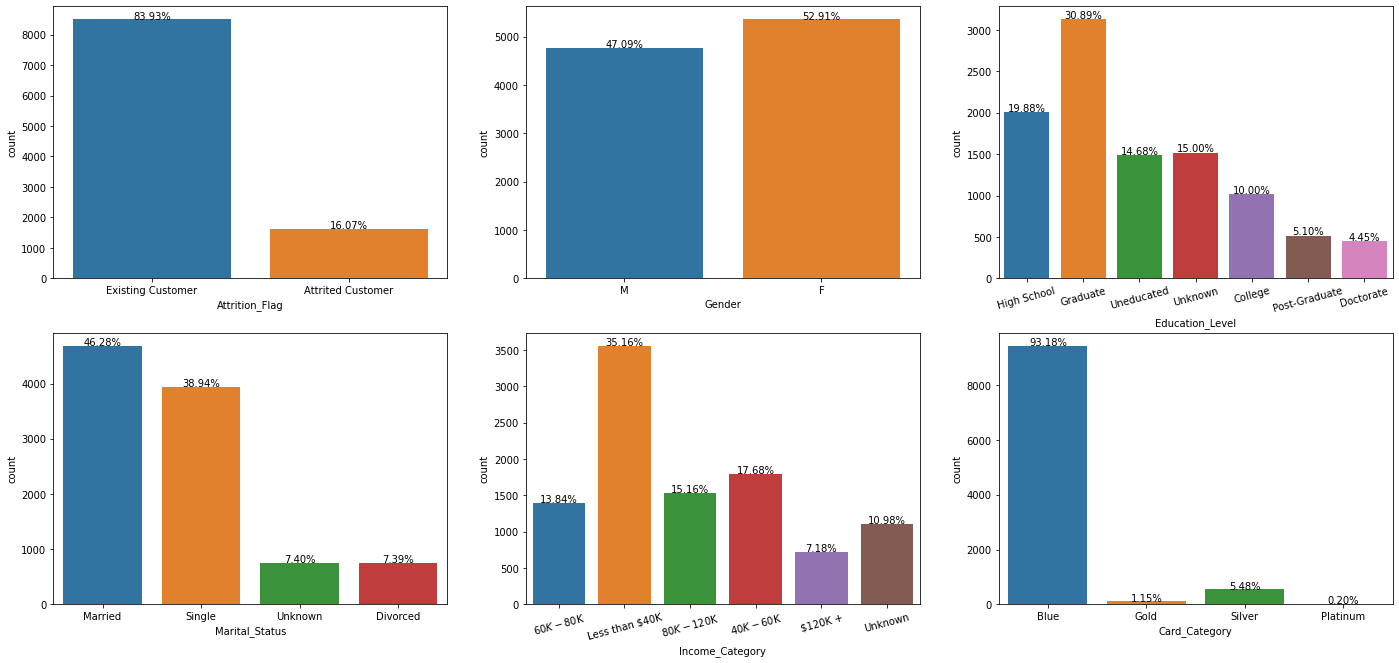

In [8]:
#imprimo las gráficas para analizar los datos de mi dataset
pltCountplot(varCategoricas, banco)

* Veamos si tenemos clientes duplicados

In [9]:
IDS = banco["CLIENTNUM"]
filtro1=IDS.duplicated()
duplicados = IDS[filtro1].shape

In [10]:
banco[IDS.isin(IDS[IDS.duplicated()])]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


*otra forma*

In [11]:
banco.duplicated().sum()

0



```

*Interpretación*
* No hay valores duplicados
* La edad minima es 26 y maxima es 73
* Existen clientes con un limite de credito muy elevado, debemos analizar si son muchos o pocos y como esto afecta a la media.
* Existen clientes que son muy activos con el uso de su tarjeta de credito

**datos nulos**

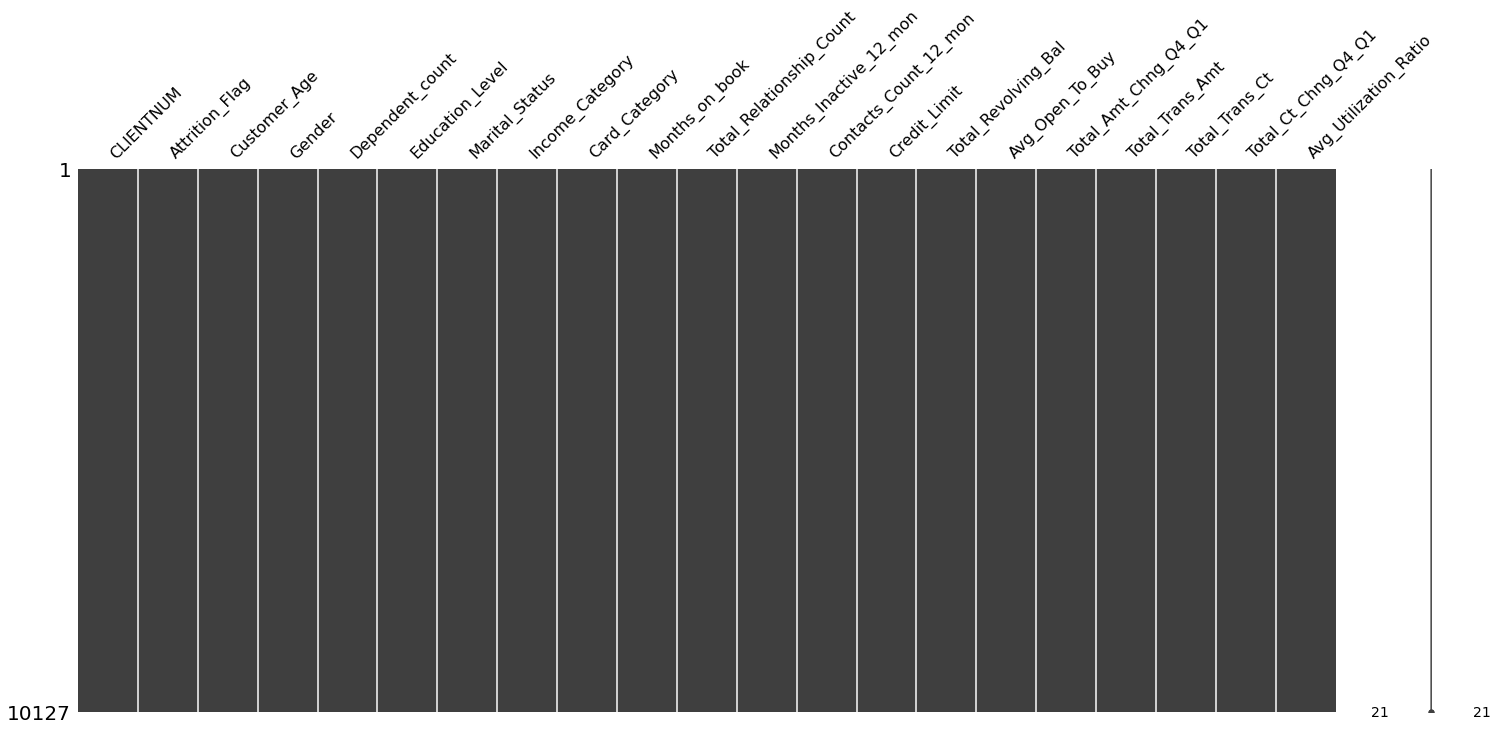

In [12]:
#utilizando la librería missigno verificamos los datos nulos en el dataset
ms.matrix(banco)

In [13]:
#Elaboramos un bucle (repeticiones) para evaluar en cada columna isna y sum
for col in banco.loc[:, banco.isna().any()].columns:                                     
  print('En la columna',col,'hay',banco[col].isna().sum(),'valores nulos')

In [14]:
banco.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

En este punto, es bueno tener  separadas las variables que trataremos como numericas y como categoricas de nuesto dataset

In [15]:
varCategoricas = ['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
varNumericas = ['CLIENTNUM','Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon',
                'Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
                'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

## 2.1.- Analisis Univariante
####Analisis de Categóricas####


* Lo que primero que se debe hacer es saber cuantas categorías existen por cada variable.

In [16]:
banco.select_dtypes(["object"]).nunique()
#banco.select_dtypes(["int"]).nunique()
#banco.select_dtypes(["float"]).nunique()

Attrition_Flag     2
Gender             2
Education_Level    7
Marital_Status     4
Income_Category    6
Card_Category      4
dtype: int64

In [17]:
banco["Marital_Status"].unique()
#banco["Education_Level"].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

**feature engineering**

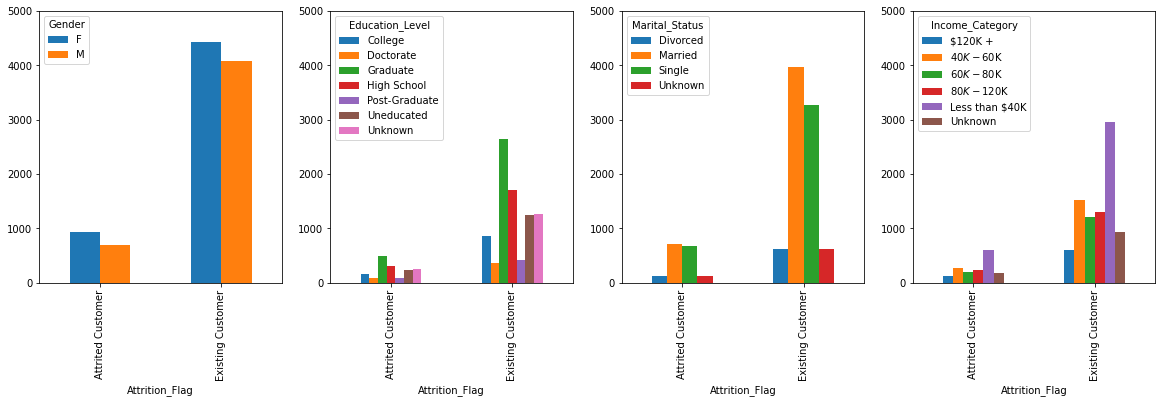

In [18]:
#revisando las influencias de mis variables

fig,(ax1, ax2, ax3, ax4)=plt.subplots(ncols=4,figsize=(20,5))
pd.crosstab(banco['Attrition_Flag'],banco['Gender']).plot(kind='bar',ax=ax1, ylim=[0,5000])
pd.crosstab(banco['Attrition_Flag'],banco['Education_Level']).plot(kind='bar',ax=ax2, ylim=[0,5000])
pd.crosstab(banco['Attrition_Flag'],banco['Marital_Status']).plot(kind='bar',ax=ax3, ylim=[0,5000])
pd.crosstab(banco['Attrition_Flag'],banco['Income_Category']).plot(kind='bar',ax=ax4, ylim=[0,5000])


**Encodear**

In [19]:
#Correlacion entre variables Categoricas#
df_categorical=banco.loc[:,banco.dtypes==np.object]

# Para tener al final la VARIABLE OBJETIVO
df_categorical = df_categorical[['Gender', 'Education_Level', 'Marital_Status', 'Income_Category','Card_Category','Attrition_Flag']]
df_categorical.head()



,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag
0,M,High School,Married,$60K - $80K,Blue,Existing Customer
1,F,Graduate,Single,Less than $40K,Blue,Existing Customer
2,M,Graduate,Married,$80K - $120K,Blue,Existing Customer
3,F,High School,Unknown,Less than $40K,Blue,Existing Customer
4,M,Uneducated,Married,$60K - $80K,Blue,Existing Customer


In [20]:
from sklearn import preprocessing
label = preprocessing.LabelEncoder()
df_categorical_encoded = pd.DataFrame() 
# RECORREMOS CADA COLUMNA DEL DF_categorical
for i in df_categorical.columns:
  df_categorical_encoded[i]=label.fit_transform(df_categorical[i])
df_categorical_encoded

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag
0,1,3,1,2,0,1
1,0,2,2,4,0,1
2,1,2,1,3,0,1
3,0,3,3,4,0,1
4,1,5,1,2,0,1
...,...,...,...,...,...,...
10122,1,2,2,1,0,1
10123,1,6,0,1,0,0
10124,0,3,1,4,0,0
10125,1,2,3,1,0,0


In [21]:
banco.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


In [22]:
banco["Gender"] = df_categorical_encoded.Gender
banco["Education_Level"] = df_categorical_encoded.Education_Level
banco["Marital_Status"] = df_categorical_encoded.Marital_Status
banco["Income_Category"] = df_categorical_encoded.Income_Category
banco["Card_Category"] = df_categorical_encoded.Card_Category
banco["Attrition_Flag"] = df_categorical_encoded.Attrition_Flag

In [23]:
banco.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,3,1,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,2,2,4,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,2,1,3,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,3,3,4,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,5,1,2,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


**Análisis de correlación - mapa de calor**

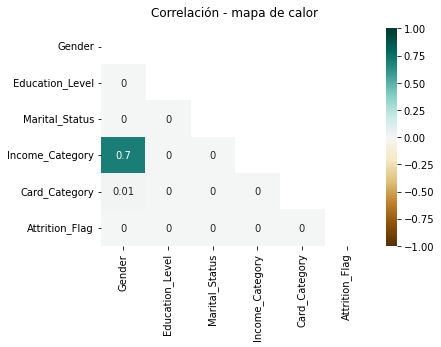

In [24]:
from scipy.stats import chi2_contingency

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) 
  stat = chi2_contingency(crosstab)[0] 
  obs = np.sum(crosstab) 
  mini = min(crosstab.shape)-1 
  return (stat/(obs*mini))

rows= []

for var1 in df_categorical_encoded:
  col = []
  for var2 in df_categorical_encoded :
    cramers =cramers_V(df_categorical_encoded[var1], df_categorical_encoded[var2]) 
    col.append(round(cramers,2)) 
  rows.append(col)

cramers_results = np.array(rows)

cramerv_matrix = pd.DataFrame(cramers_results, columns = df_categorical_encoded.columns, index =df_categorical_encoded.columns)
mask = np.triu(np.ones_like(cramerv_matrix, dtype=np.bool))

cat_heatmap = sns.heatmap(cramerv_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
cat_heatmap.set_title('Correlación - mapa de calor', fontdict={'fontsize':12}, pad=12);

**outliers**

In [25]:
banco.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,3,1,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,2,2,4,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


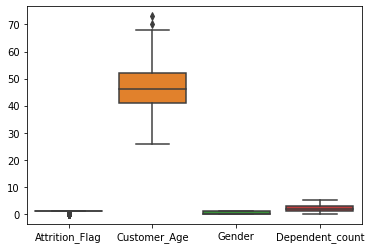

In [26]:
boxplot1 = banco.iloc[:, 1:5]
sns.boxplot(data=boxplot1)

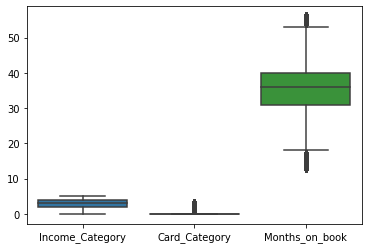

In [27]:
boxplot2 = banco[['Income_Category', 'Card_Category', 'Months_on_book']]
sns.boxplot(data=boxplot2)

**reseter el index por defecto**

In [28]:
banco.reset_index(drop=True)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,3,1,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,2,2,4,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,2,1,3,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,3,3,4,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,5,1,2,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,50,1,2,2,2,1,0,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,0,41,1,2,6,0,1,0,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,0,44,0,1,3,1,4,0,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,0,30,1,2,2,3,1,0,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


**convertir datos float a int**

In [29]:
banco.Credit_Limit

0        12691.0
1         8256.0
2         3418.0
3         3313.0
4         4716.0
          ...   
10122     4003.0
10123     4277.0
10124     5409.0
10125     5281.0
10126    10388.0
Name: Credit_Limit, Length: 10127, dtype: float64

In [30]:
banco["Credit_Limit"] = banco.Credit_Limit.astype(int)

**guardar la data en tu drive**

In [31]:
#das acceso a tu drive (logearse)
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [32]:
#ubicas la dirección donde quieres que se guarde el archivo
banco.to_csv('/content/drive/MyDrive/banco.csv')

#**bonus**

In [33]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 5.2 MB/s 


In [34]:
import sweetviz as sv
import IPython
from IPython.core.display import display, HTML

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



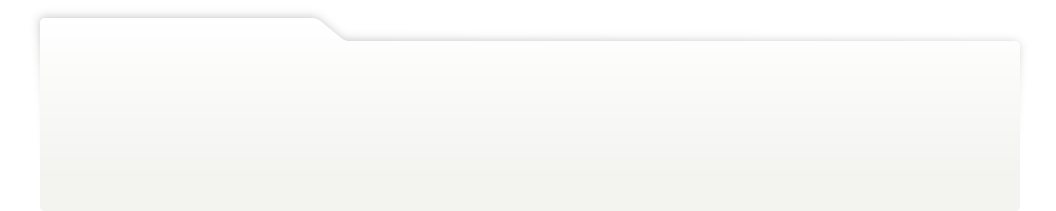
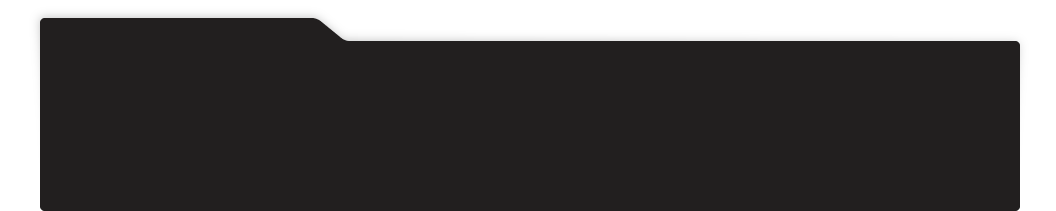
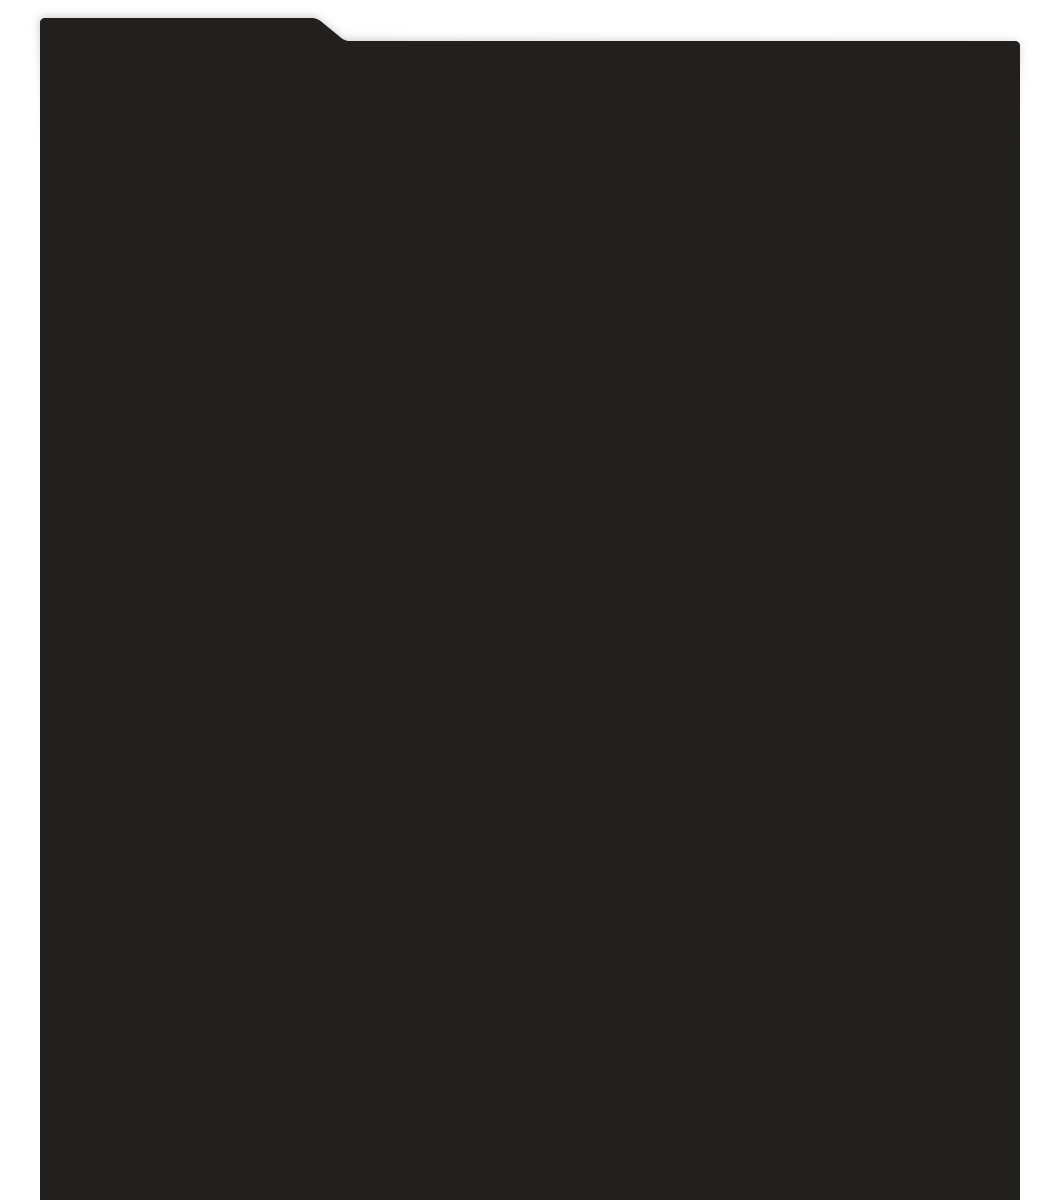
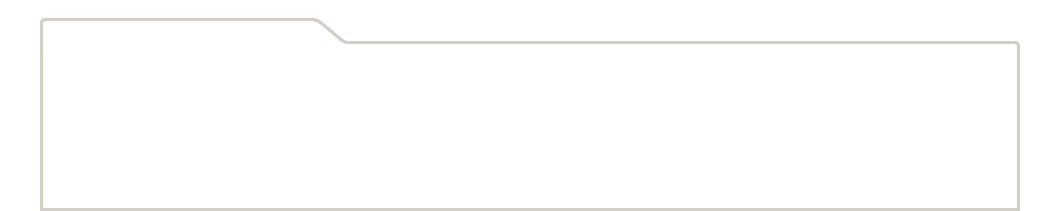
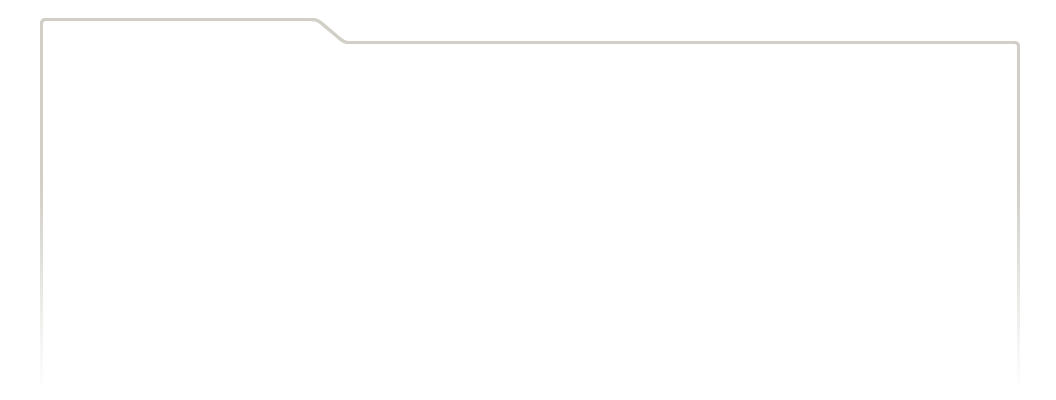
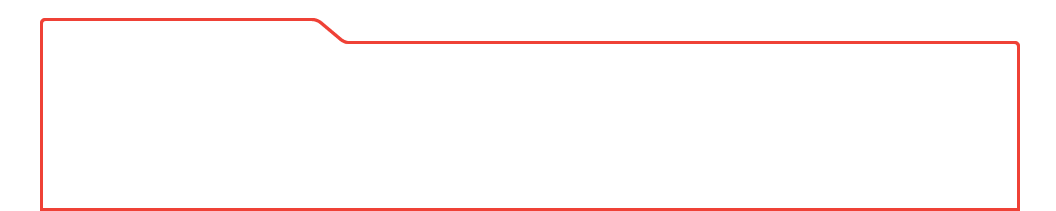
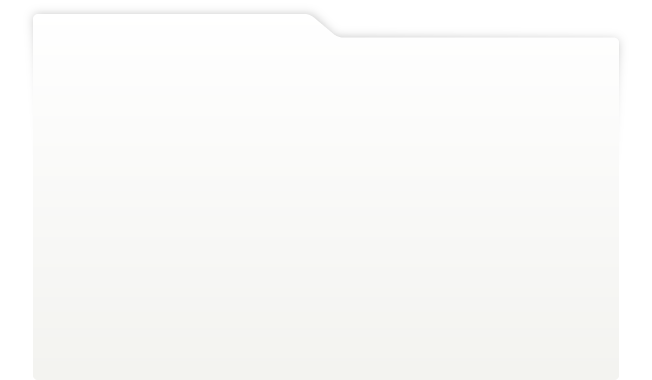
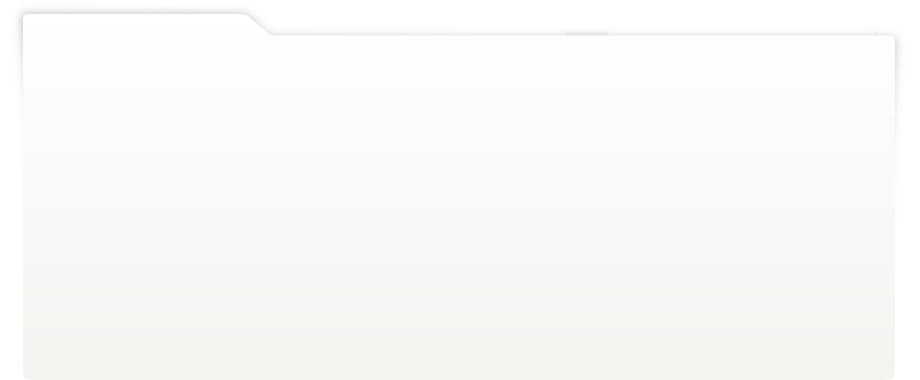
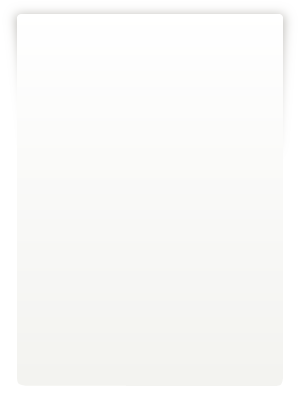
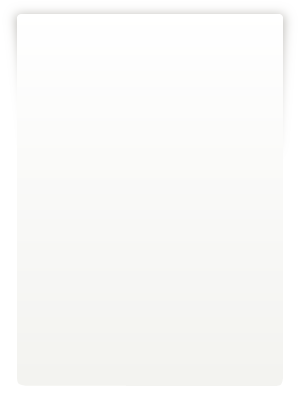
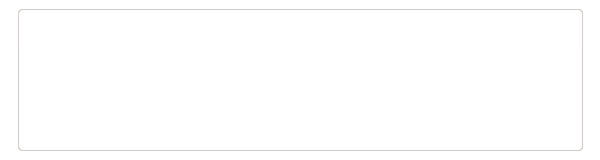
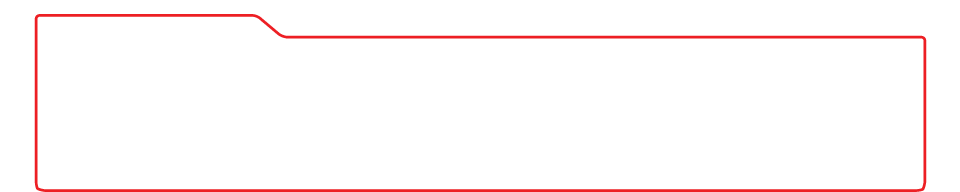
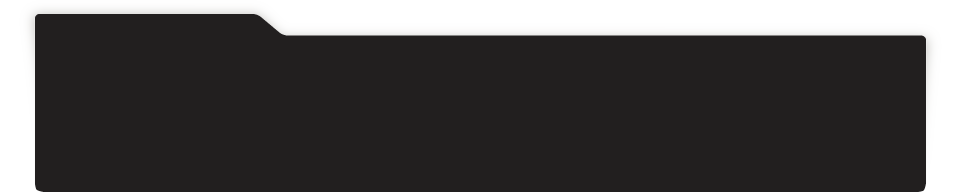
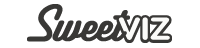
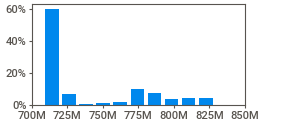
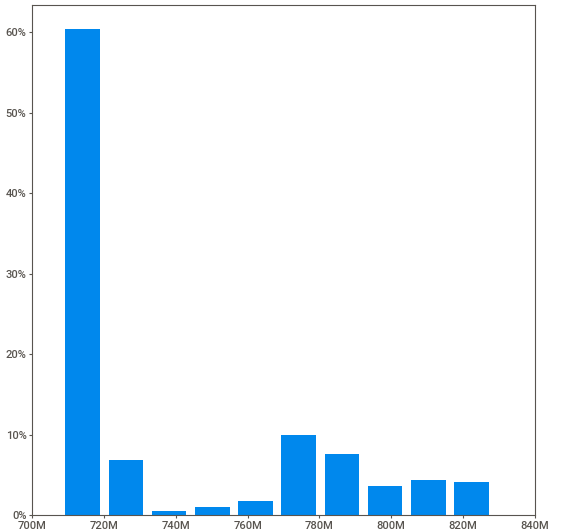
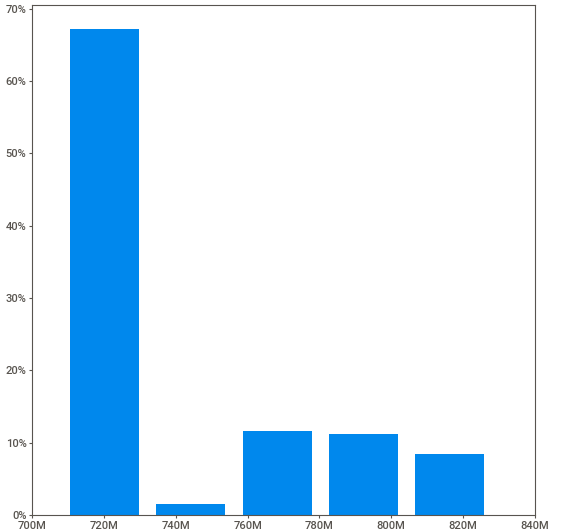
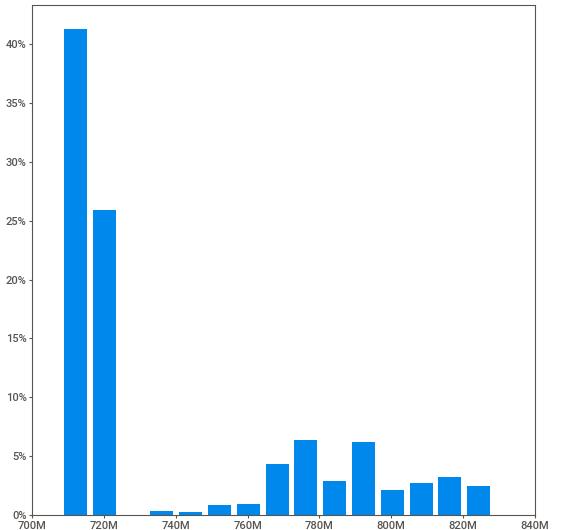
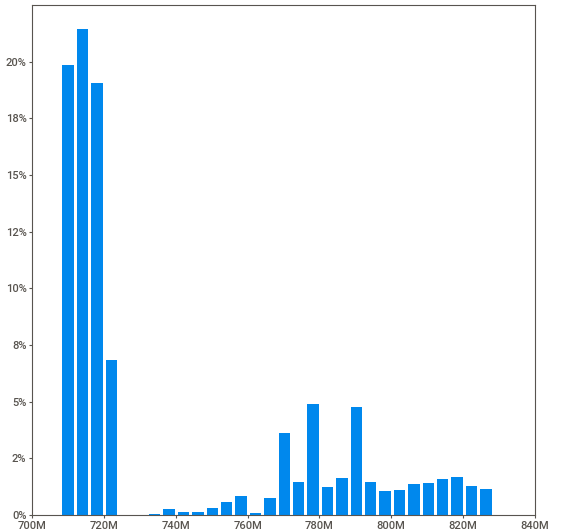
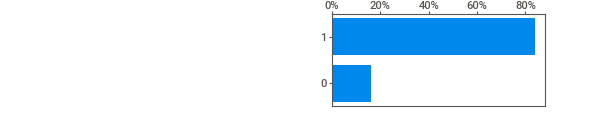
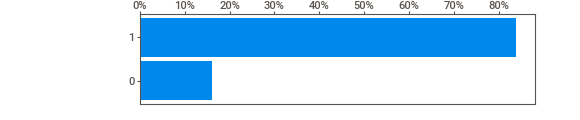
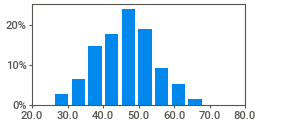
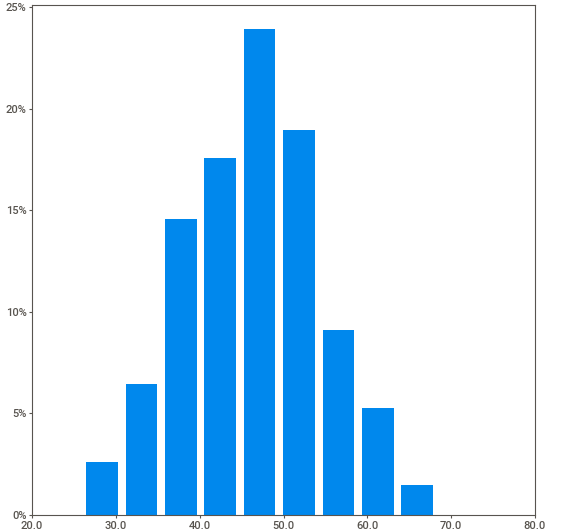
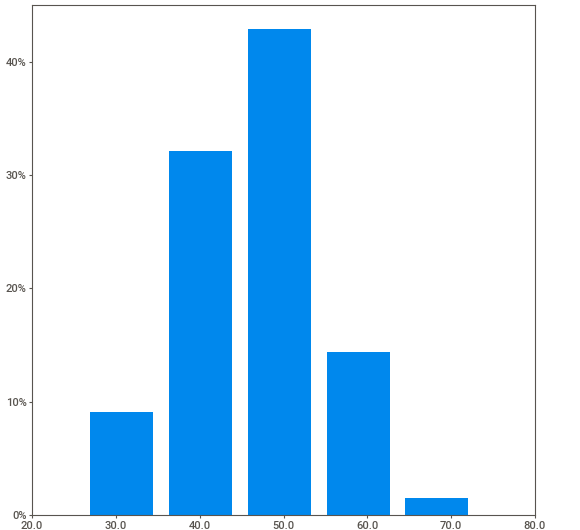
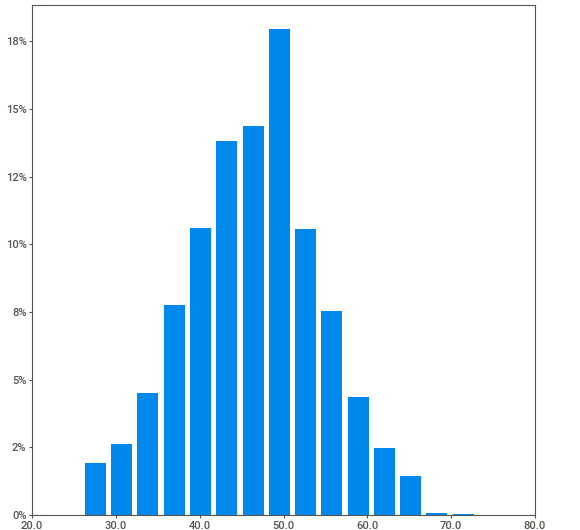
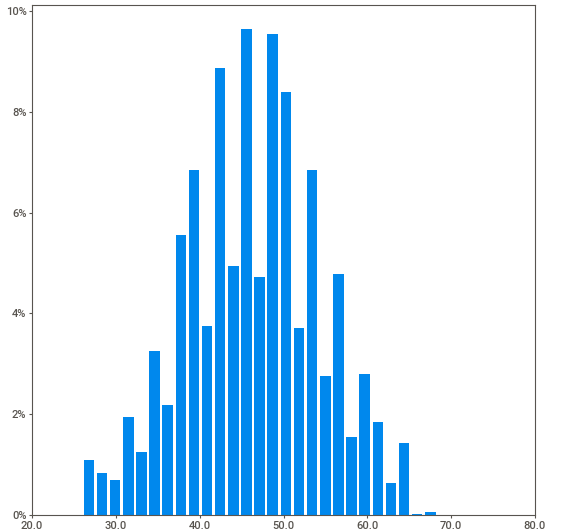
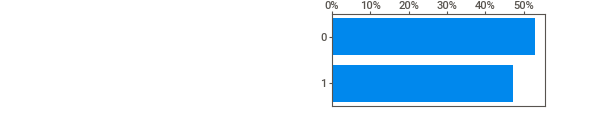
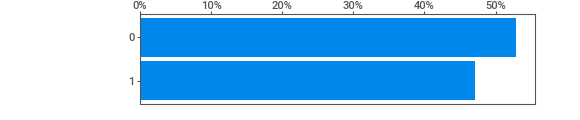
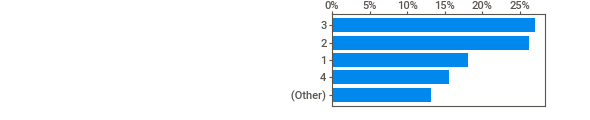
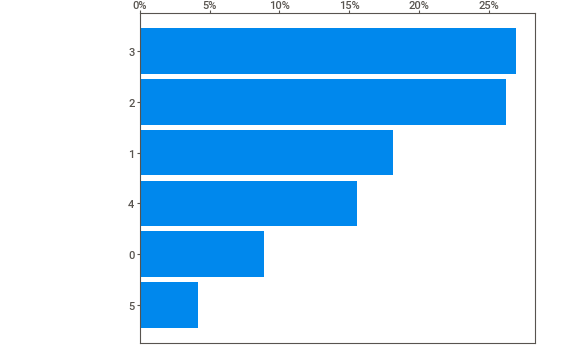
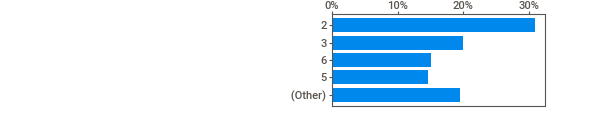
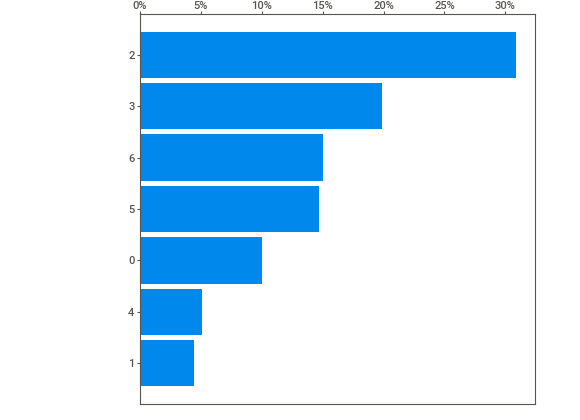
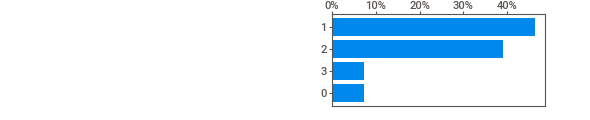
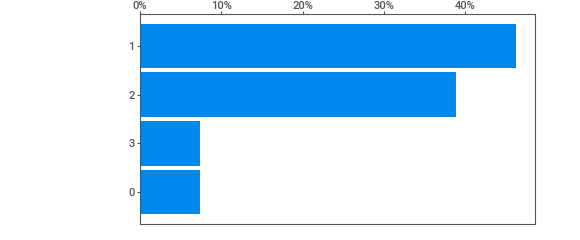
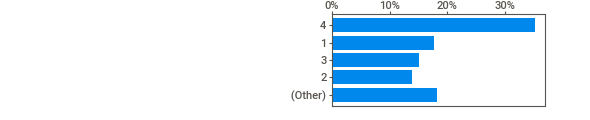
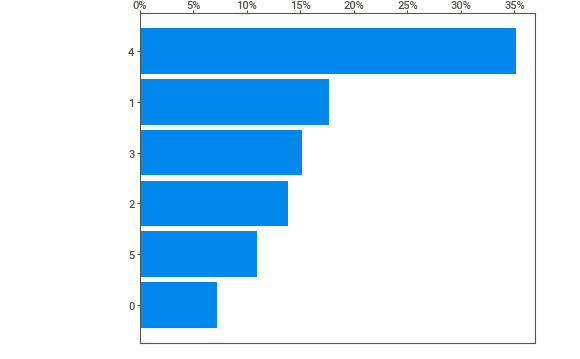
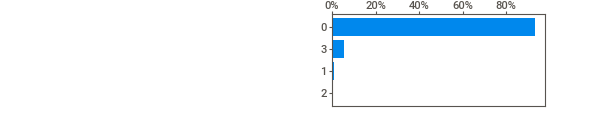
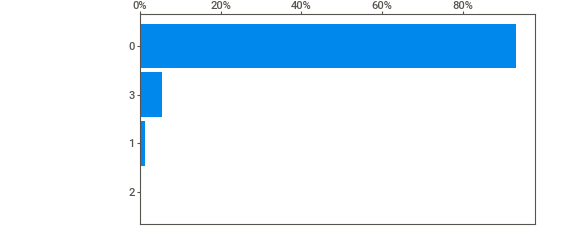
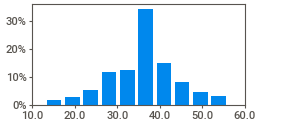
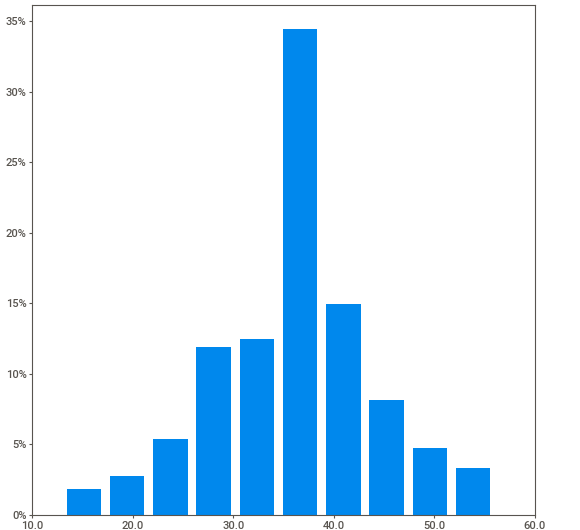
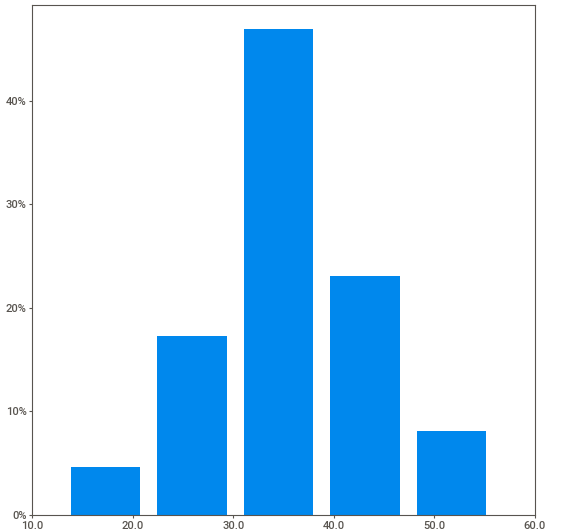
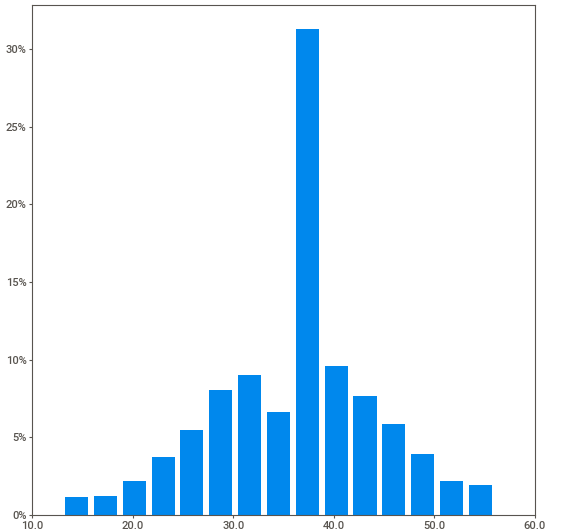
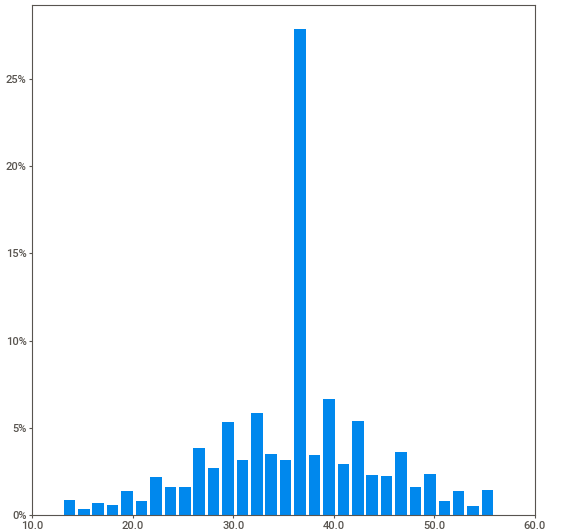
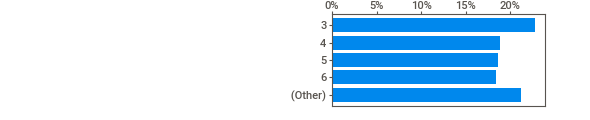
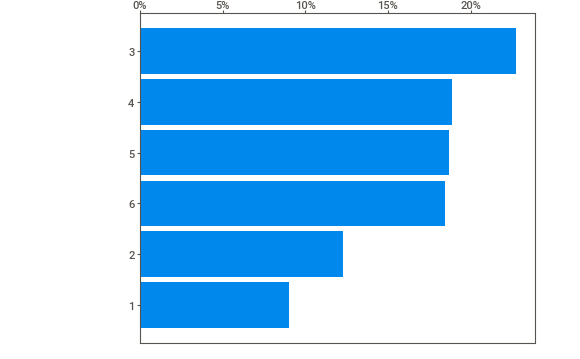
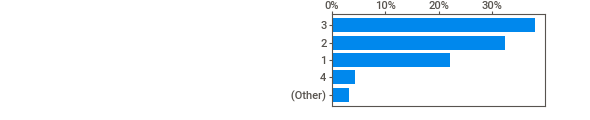
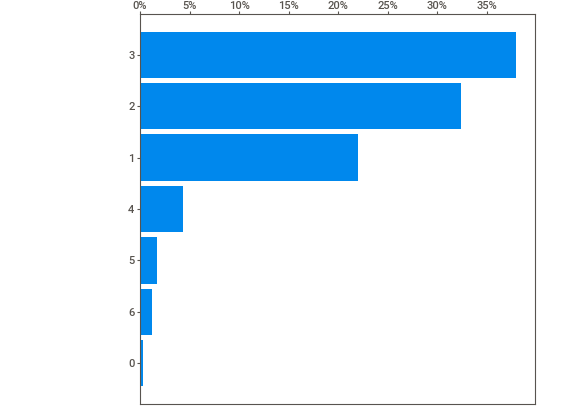
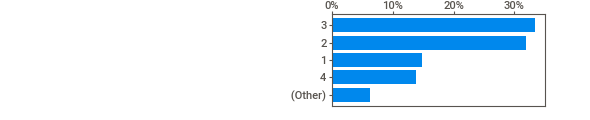
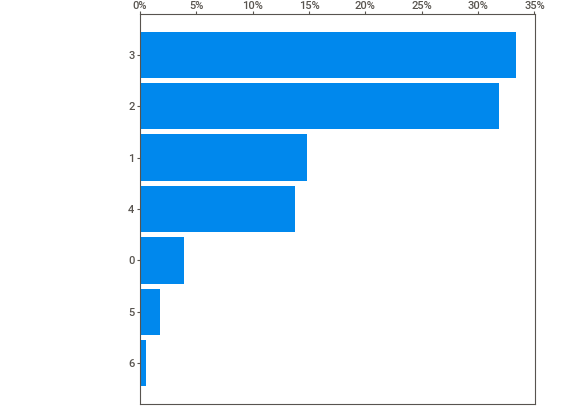
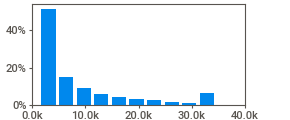
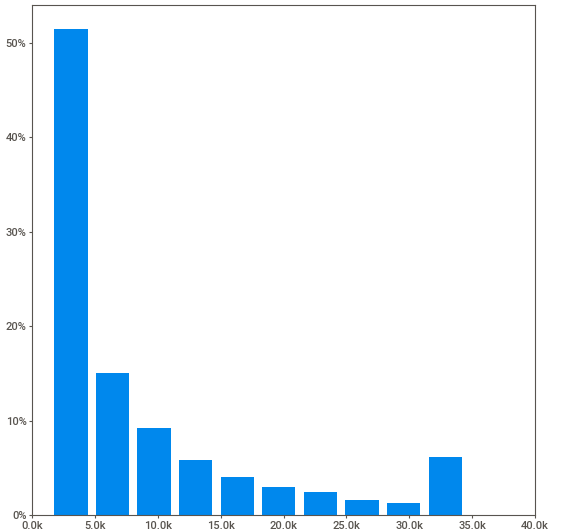
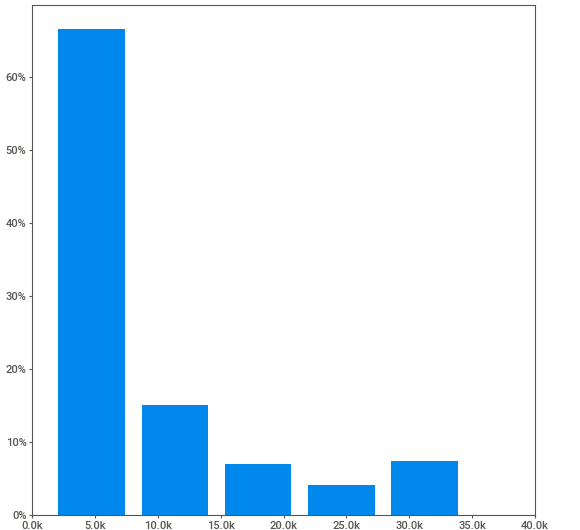
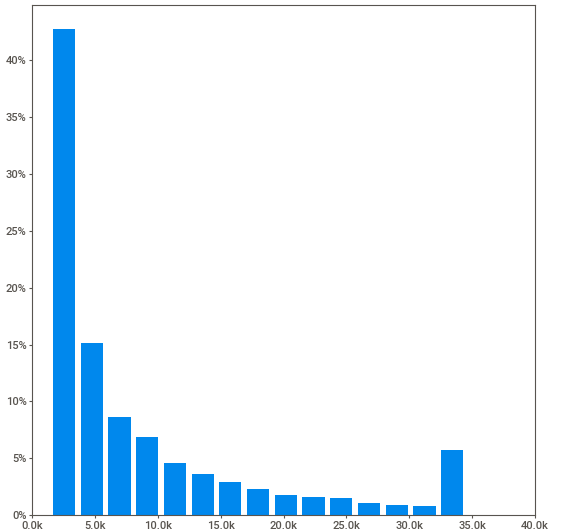
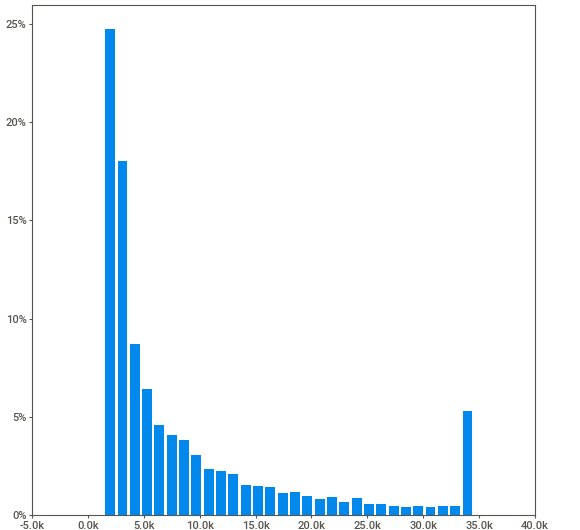
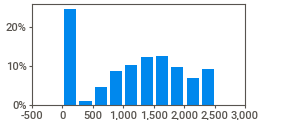
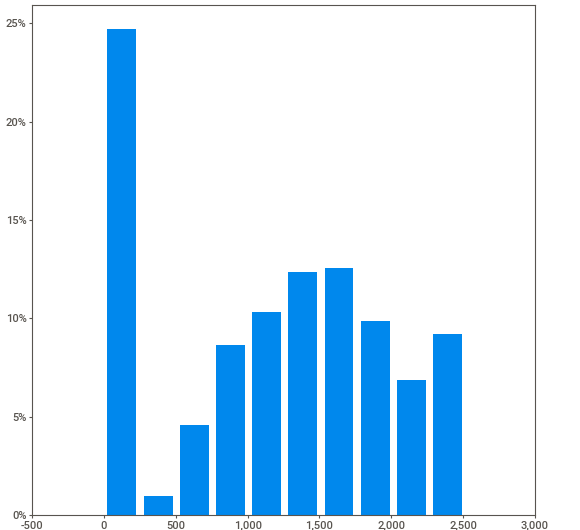
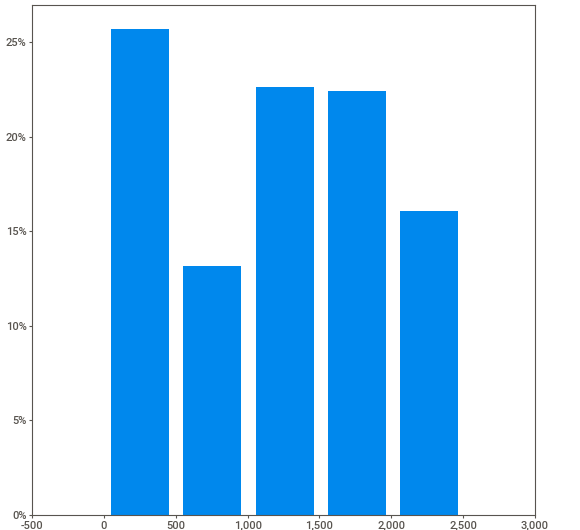
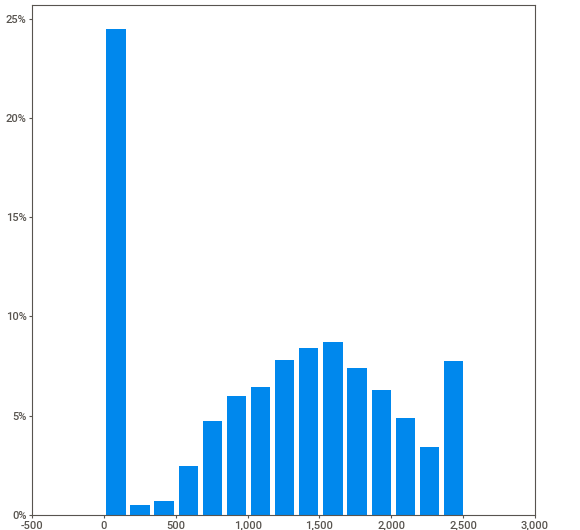
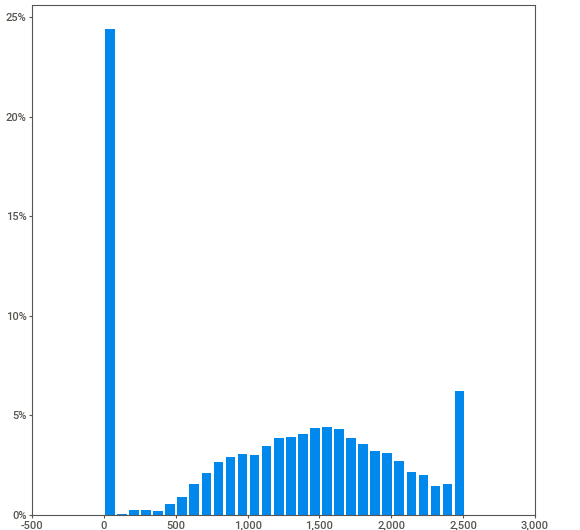
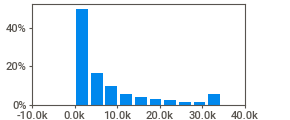
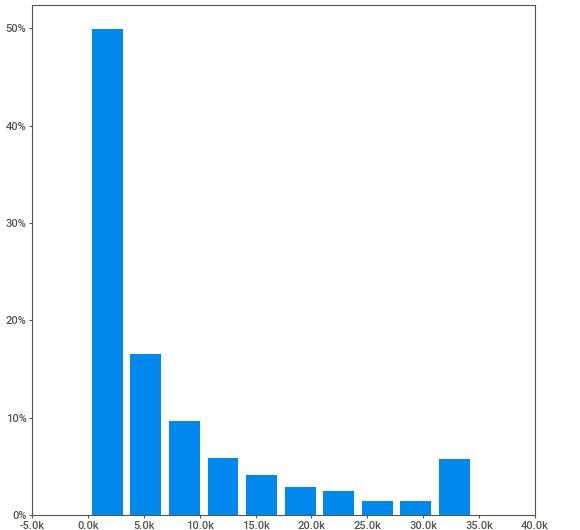
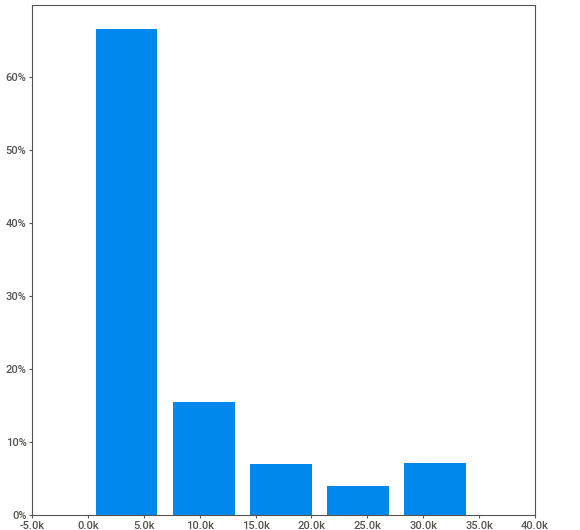
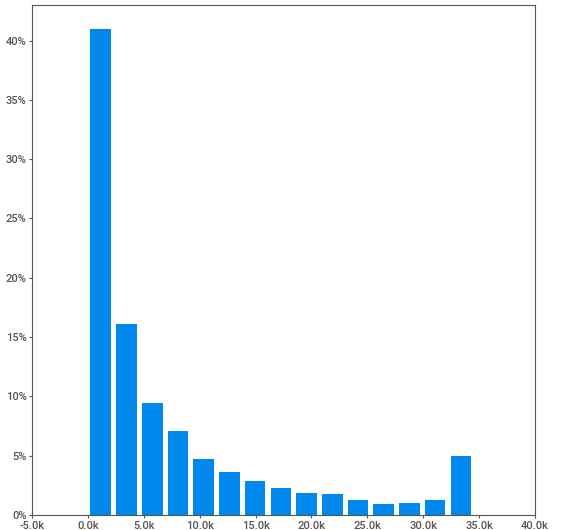
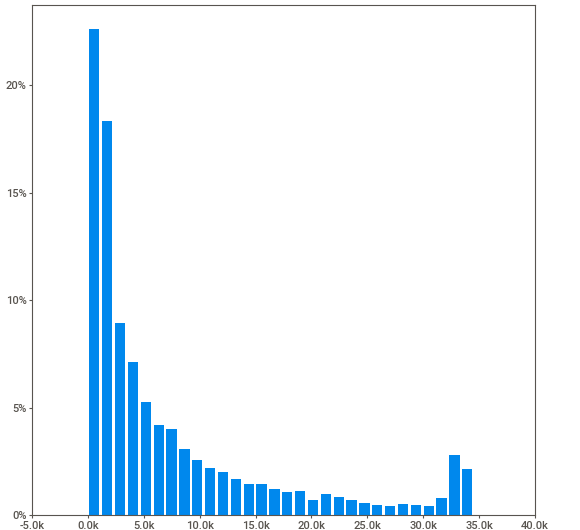
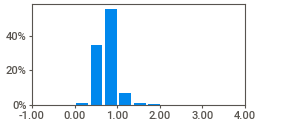
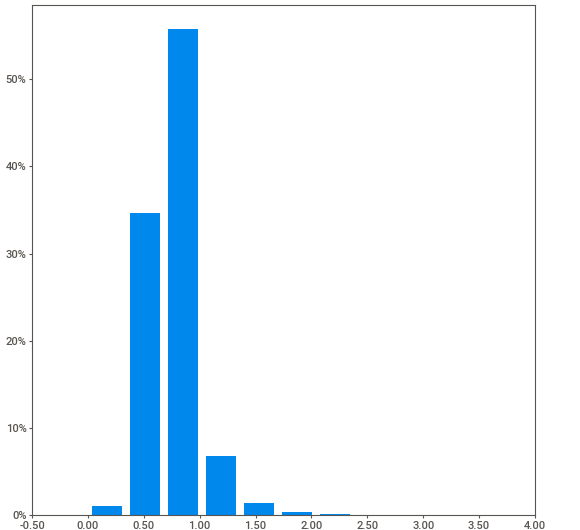
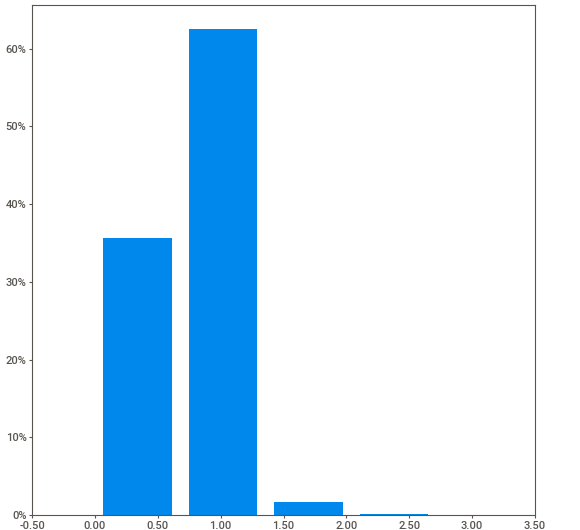
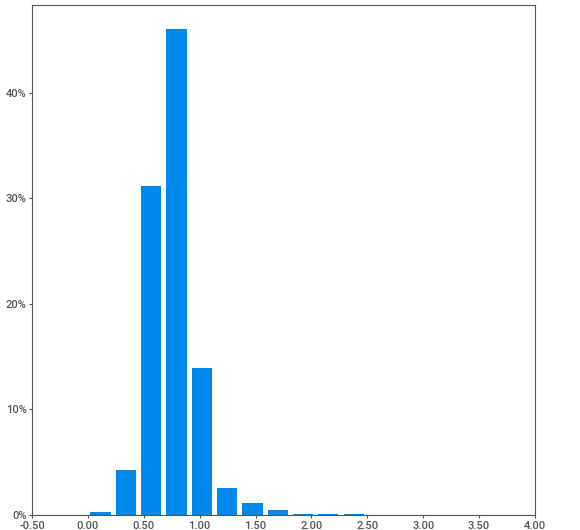
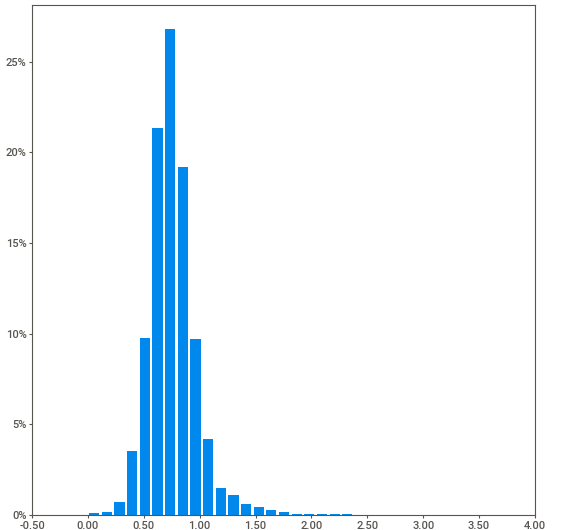
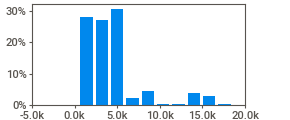
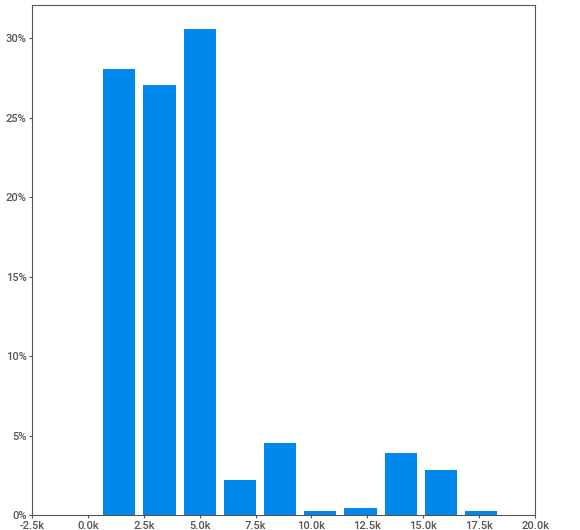
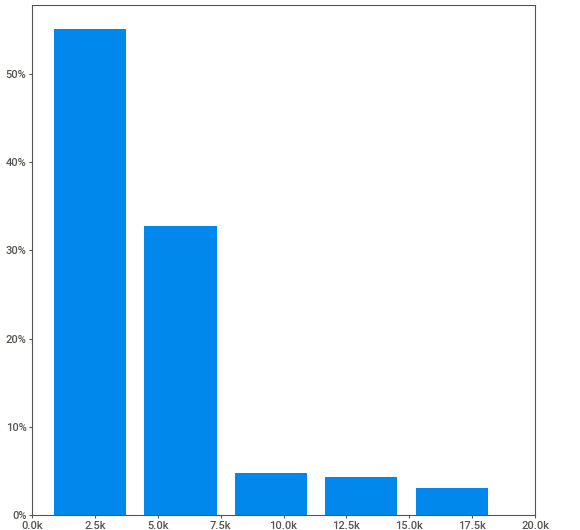
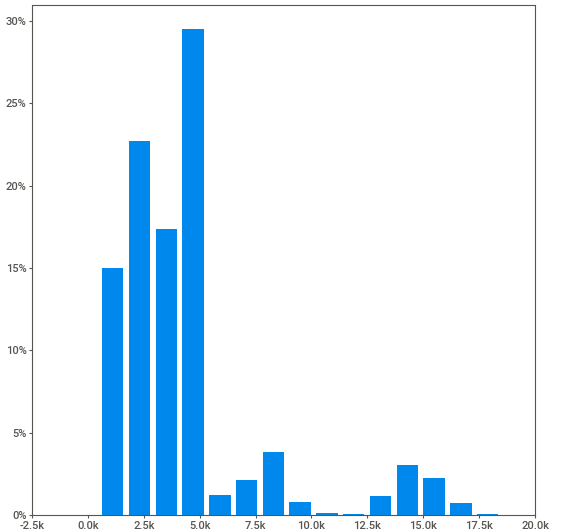
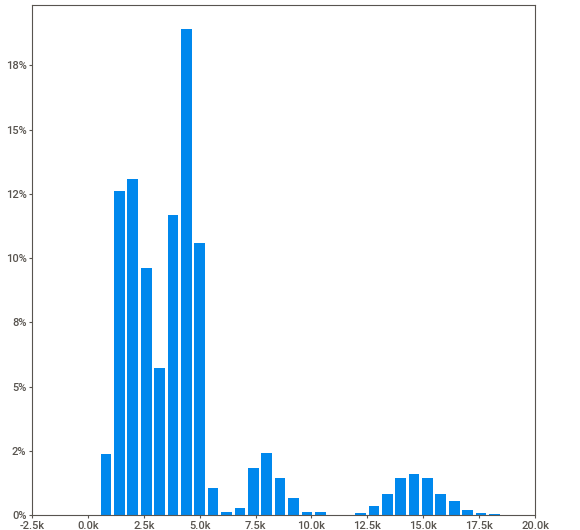
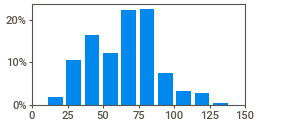
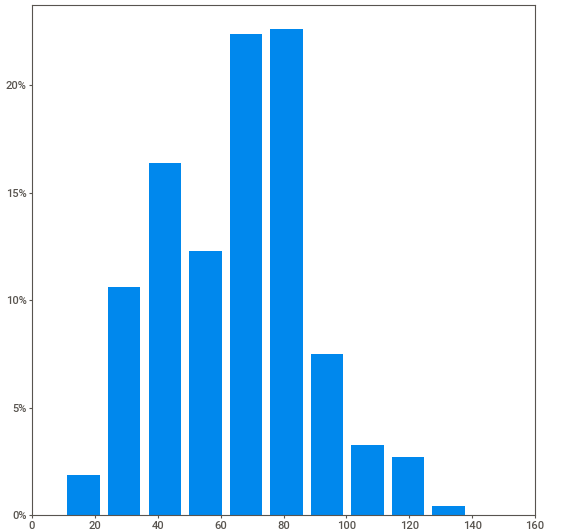
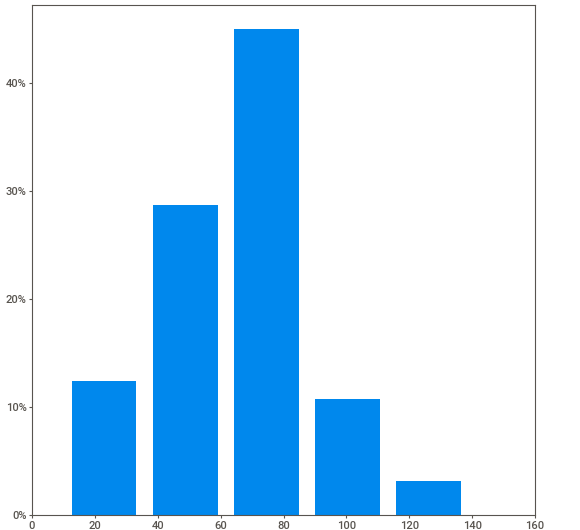
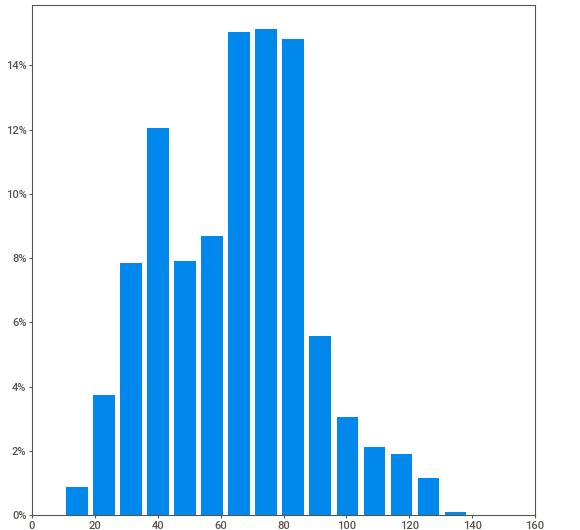
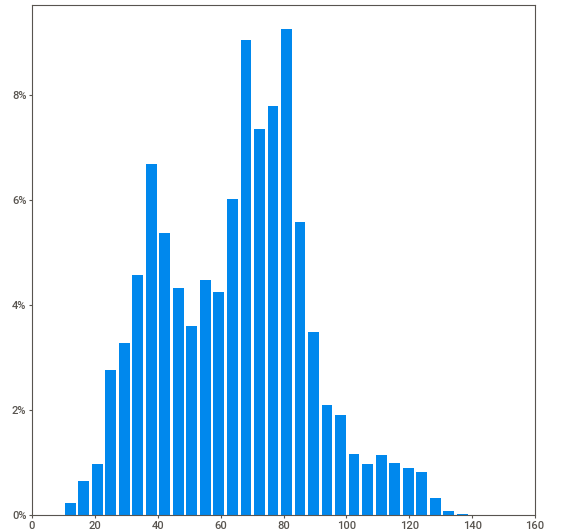
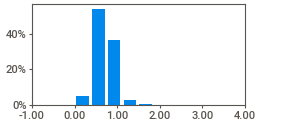
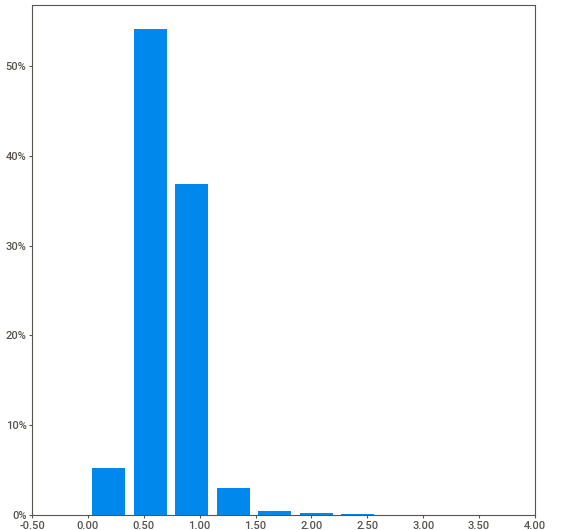
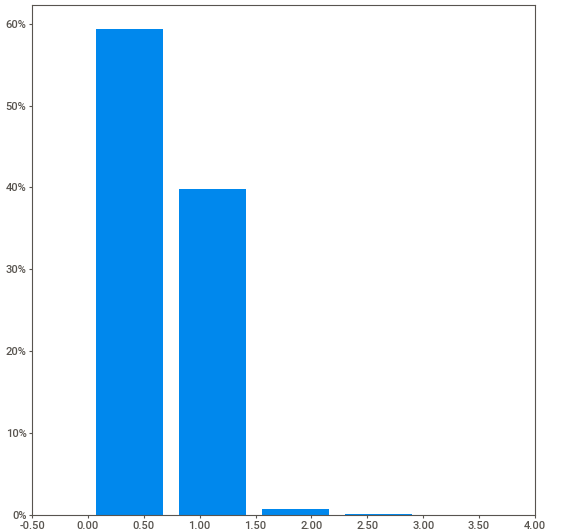
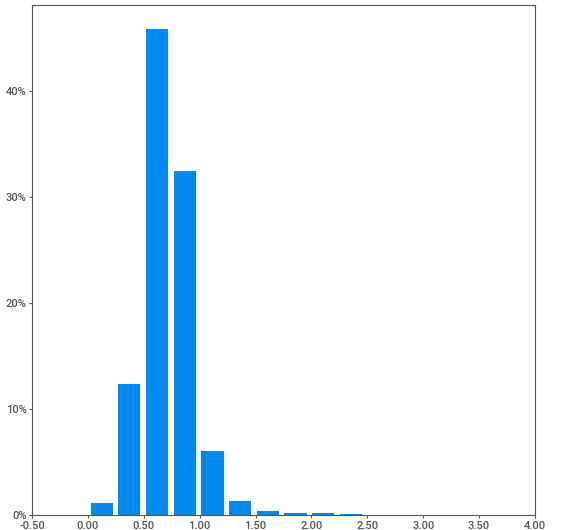
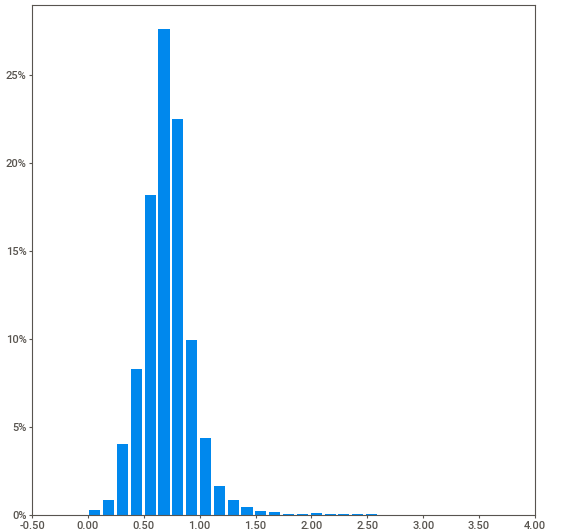
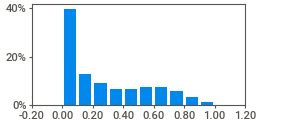
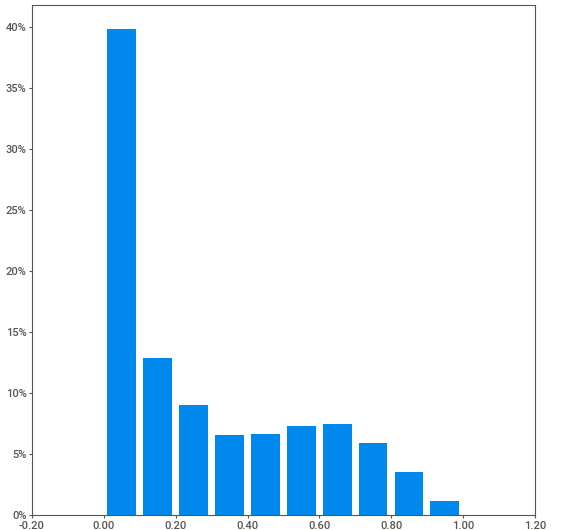
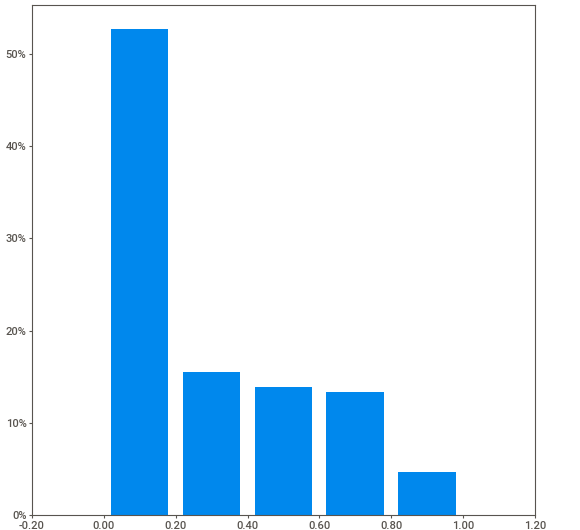
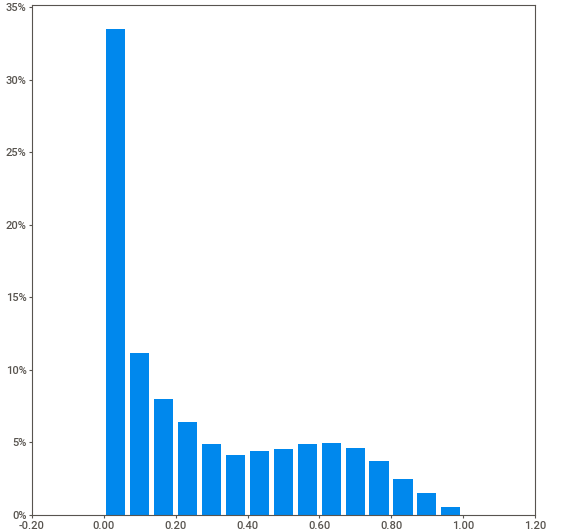
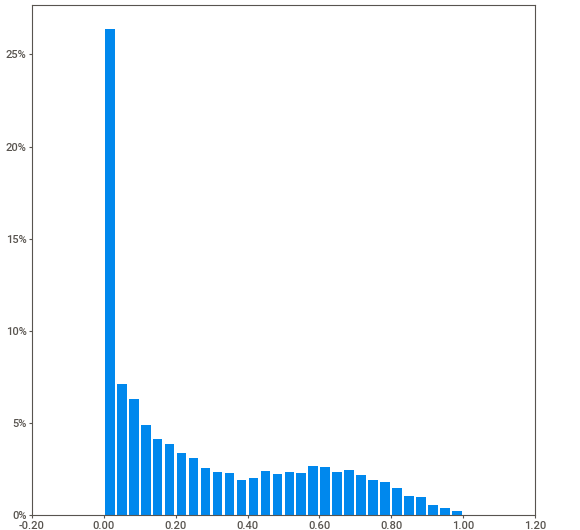
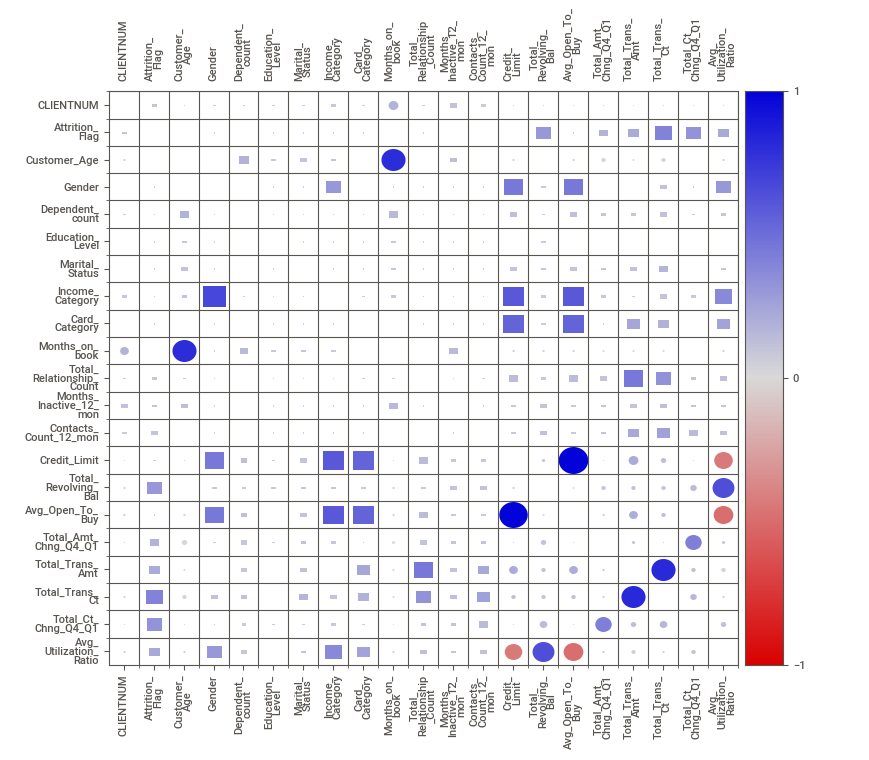
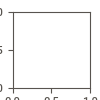

In [35]:
feature_config = sv.FeatureConfig(force_cat = ["Attrition_Flag"])
my_report = sv.analyze(banco,  feat_cfg=feature_config)
my_report.show_html('SWEETVIZ_REPORT.html')
display(HTML('SWEETVIZ_REPORT.html'))